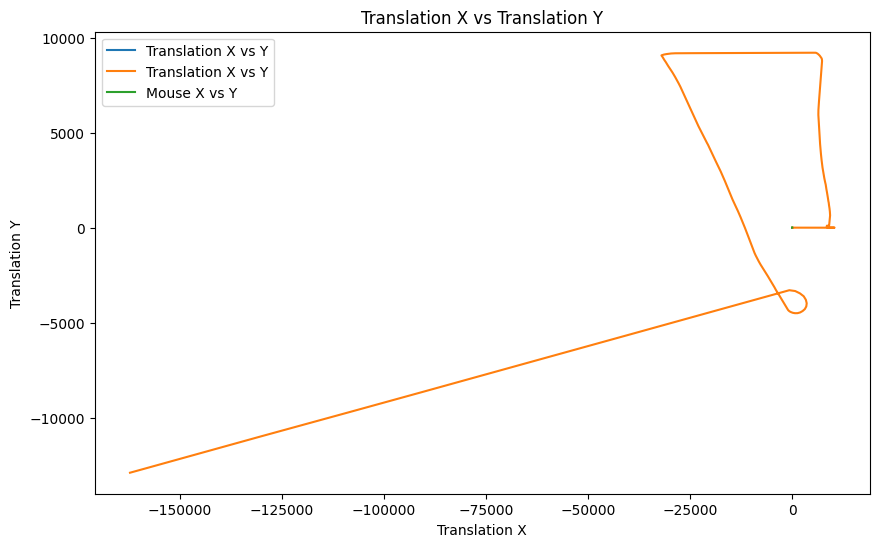

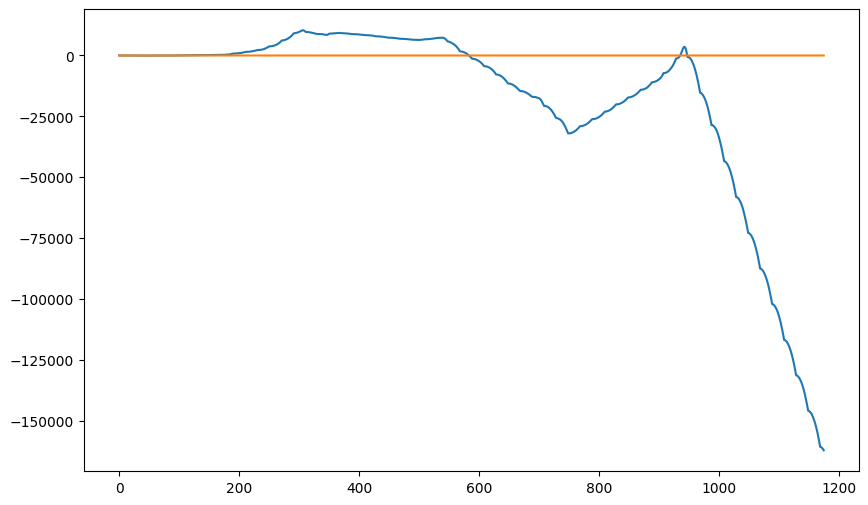

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
tf_df = pd.read_csv('tf_data.csv')
imu_df = pd.read_csv('imu_data.csv')
mouse_df = pd.read_csv('mouse_data.csv')
wheel_ticks_df = pd.read_csv('wheel_ticks_data.csv')

imu_df['speed_x'] = (imu_df['linear_acceleration_x'] * imu_df['timestamp_nanosec'] *10e-9).cumsum()
imu_df['speed_y'] = (imu_df['linear_acceleration_y'] * imu_df['timestamp_nanosec'] *10e-9).cumsum()
imu_df['speed_z'] = (imu_df['linear_acceleration_z'] * imu_df['timestamp_nanosec'] *10e-9).cumsum()

# general_speed = np.sqrt(imu_df['speed_x']**2 + imu_df['speed_y']**2)
imu_df['translation_x'] = (imu_df['speed_x'] * np.cos(np.deg2rad(imu_df['orientation_z'] * 360)) * imu_df['timestamp_nanosec'] *10e-9).cumsum()
imu_df['translation_y'] = (imu_df['speed_y'] * np.sin(np.deg2rad(imu_df['orientation_z'] * 360)) * imu_df['timestamp_nanosec'] *10e-9).cumsum()
plt.figure(figsize=(10, 6))
plt.plot(tf_df['translation_x'], tf_df['translation_y'], label='Translation X vs Y')
plt.plot(imu_df['translation_x'], imu_df['translation_y'], label='Translation X vs Y')
plt.plot(mouse_df['integrated_x'], mouse_df['integrated_y'], label='Mouse X vs Y')
# plt.plot(imu_df['translation_x'], imu_df['translation_y'], label='Translation X vs Y')
plt.xlabel('Translation X')
plt.ylabel('Translation Y')
plt.title('Translation X vs Translation Y')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(imu_df['translation_x'])
plt.plot(tf_df['translation_x'] / 3)
# plt.plot(general_speed)
# plt.plot(imu_df['linear_acceleration_x'])
# plt.plot(imu_df['orientation_z']/2)
# plt.xlim(200, 1000)
# plt.plot(imu_df['translation_x'])
plt.show()